# Task 2

### Naive KNN

In [62]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install memory-profiler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached memory_profiler-0.61.0-py3-none-any.whl.metadata (20 kB)
Using cached memory_profiler-0.61.0-py3-none-any.whl (31 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
def distance(x1 , x2):
    dist = np.sqrt(np.sum((x1-x2)**2))
    return dist

In [63]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        print(k_nearest_labels)

        # majority vote
        label_counts = {}
        for label in k_nearest_labels:
            if label in label_counts:
                label_counts[label] += 1
            else:
                label_counts[label] = 1

        # Find the label with the highest count
        most_common_label = max(label_counts, key=label_counts.get)
        print("most_common_label =", most_common_label)
        
        return k_indices
        

In [37]:
# Generate random data
np.random.seed(42)
X_train = np.random.rand(100, 2)
y_train = np.random.randint(0, 2, size=100)
X_test = np.array([[0.5, 0.5]])

X_train, y_train

(array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615],
        [0.60111501, 0.70807258],
        [0.02058449, 0.96990985],
        [0.83244264, 0.21233911],
        [0.18182497, 0.18340451],
        [0.30424224, 0.52475643],
        [0.43194502, 0.29122914],
        [0.61185289, 0.13949386],
        [0.29214465, 0.36636184],
        [0.45606998, 0.78517596],
        [0.19967378, 0.51423444],
        [0.59241457, 0.04645041],
        [0.60754485, 0.17052412],
        [0.06505159, 0.94888554],
        [0.96563203, 0.80839735],
        [0.30461377, 0.09767211],
        [0.68423303, 0.44015249],
        [0.12203823, 0.49517691],
        [0.03438852, 0.9093204 ],
        [0.25877998, 0.66252228],
        [0.31171108, 0.52006802],
        [0.54671028, 0.18485446],
        [0.96958463, 0.77513282],
        [0.93949894, 0.89482735],
        [0.59789998, 0.92187424],
        [0.0884925 , 0.19598286],
        [0.045

In [65]:
# Parameters
k = 3

# Naive KNN
naive_knn = KNN(k)
start_time = time.time()
mem_usage = memory_usage((naive_knn.fit, (X_train, y_train)))
train_time_naive = time.time() - start_time
start_time = time.time()
y_hat = naive_knn.predict(X_test)[0]
test_time_naive = time.time() - start_time
print("Naive KNN predictions:", y_hat)
print("Train time of Naive KNN -", train_time_naive)
print("Test time of Naive KNN -", test_time_naive)
print("Memory usage of Naive KNN -", mem_usage)

[np.int32(0), np.int32(1), np.int32(1)]
most_common_label = 1
Naive KNN predictions: [48 73 81]
Train time of Naive KNN - 5.9687395095825195
Test time of Naive KNN - 0.0009007453918457031
Memory usage of Naive KNN - [82.58203125, 82.58203125, 82.58203125]


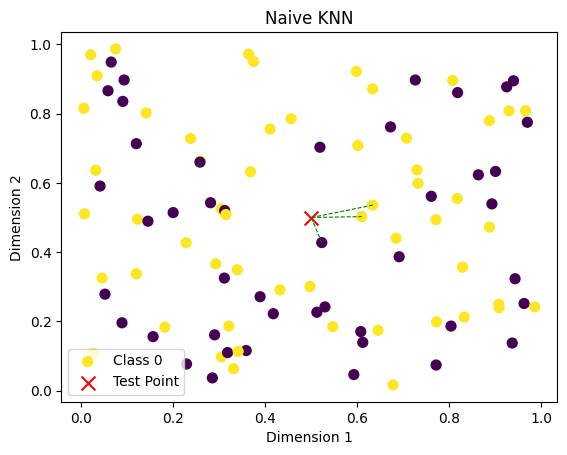

In [54]:

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, label="Class 0")
plt.scatter(X_test[0, 0], X_test[0, 1], color='red', label='Test Point', marker='x', s=100)
plt.legend()

# Plot naive KNN neighbors
for idx in y_hat:
    plt.plot([X_test[0, 0], X_train[idx, 0]], [X_test[0, 1], X_train[idx, 1]], 'g--', linewidth=0.8, label='Naive KNN Neighbor' if idx == y_hat[0] else "")

plt.title("Naive KNN")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

### KD Tree KNN

In [66]:
class KDTreeNode:
    def __init__(self, point, label, left=None, right=None):
        self.point = point
        self.label = label
        self.left = left
        self.right = right

class KDTREEKNN:
    def __init__(self, k):
        self.k = k
        self.tree = None

    def fit(self, X, y):
        # Build the KD-tree
        points = list(zip(X, y))
        self.tree = self.build_kdtree(points)

    def build_kdtree(self, points, depth=0):
        n = len(points)
        if n <= 0:
            return None

        # Select axis based on depth so that axis cycles over all dimensions
        axis = depth % len(points[0][0])
        # Sort points by the selected axis and pick the median as pivot
        points.sort(key=lambda x: x[0][axis])
        median = n // 2

        # Create node and construct subtrees
        return KDTreeNode(
            point=points[median][0],
            label=points[median][1],
            left=self.build_kdtree(points[:median], depth + 1),
            right=self.build_kdtree(points[median + 1:], depth + 1)
        )

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # Dictionary to store k nearest neighbors {distance: label}
        nearest_neighbors = {}
        
        # Recursive function to search the KD-tree
        def knn_search(node, depth=0):
            if node is None:
                return
            
            # Calculate distance between the point and the node's point
            dist = np.linalg.norm(x - node.point)
            
            # Update nearest neighbors dictionary
            if len(nearest_neighbors) < self.k:
                nearest_neighbors[dist] = node.label
            else:
                # If we have k neighbors, check if the current distance is smaller than the farthest neighbor
                max_dist = max(nearest_neighbors.keys())
                if dist < max_dist:
                    # Remove the farthest neighbor and add the current one
                    nearest_neighbors.pop(max_dist)
                    nearest_neighbors[dist] = node.label

            # Choose the axis based on depth
            axis = depth % len(x)
            # Determine whether to go left or right in the tree
            if x[axis] < node.point[axis]:
                knn_search(node.left, depth + 1)
                # Check if we need to search the other side
                if abs(x[axis] - node.point[axis]) < max(nearest_neighbors.keys()) or len(nearest_neighbors) < self.k:
                    knn_search(node.right, depth + 1)
            else:
                knn_search(node.right, depth + 1)
                # Check if we need to search the other side
                if abs(x[axis] - node.point[axis]) < max(nearest_neighbors.keys()) or len(nearest_neighbors) < self.k:
                    knn_search(node.left, depth + 1)
        
        # Start search from root
        knn_search(self.tree)
        
        # Return the labels of the k nearest neighbors
        return list(nearest_neighbors.values())

In [67]:
# Parameters
k = 3

# KD KNN
KD_knn = KDTREEKNN(k)
start_time = time.time()
mem_usage = memory_usage((KD_knn.fit, (X_train, y_train)))
train_time_KD = time.time() - start_time
start_time = time.time()
y_hat = KD_knn.predict(X_test)[0]
test_time_KD = time.time() - start_time
print("KD KNN predictions:", y_hat)
print("Train time of KD KNN -", train_time_KD)
print("Test time of KD KNN -", test_time_KD)
print("Memory usage of KD KNN -", mem_usage)

KD KNN predictions: [np.int32(1), np.int32(1), np.int32(0)]
Train time of KD KNN - 3.5386626720428467
Test time of KD KNN - 0.04772043228149414
Memory usage of KD KNN - [82.65234375, 82.65234375, 82.65234375, 82.65234375, 82.65234375, 82.65234375, 82.65234375, 82.65234375]
